In [507]:
from scipy.optimize import nnls, lsq_linear
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.cm import ScalarMappable
from sklearn.preprocessing import minmax_scale

In [2]:
%cd "/data/groups/ag_kircher/"

/fast/home/groups/ag_kircher


# Load sample predictions and tissue expression

In [168]:
samples_cell = ["BH01", "IH01", "IH02", "IC15", "IC17", "IC20", "IC35", "IC37"]

In [169]:
pred_cell = {}
for sample in samples_cell: 
    pred_cell[sample] = pd.read_csv("cfDNA-reanalysis_Graz/kristin/snakemake_rfmodel/results/predictions/37/predictions_%s.csv" %sample, index_col = 0).predicted

In [170]:
samples_graz = ["NPH001", "NPH002", "NPH003", "NPH004", "NPH005", "P147_1", "P147_3", "P148_1", "P148_3", "P40_1", "P40_2"]

In [171]:
pred_graz = {}
for sample in samples_graz: 
    pred_graz[sample] = pd.read_csv("cfDNA-reanalysis_Graz/kristin/snakemake_rfmodel/results/predictions/37/predictions_%s.csv" %sample, index_col = 0).predicted

In [93]:
expressionData = pd.read_csv("cfDNA-reanalysis_Graz/kristin/cfDNA/resources/protein_atlas/RNAtableExtended.tsv.gz", index_col = 0 ,compression = "gzip", header = 0, sep = "\t")


In [94]:
pd.set_option('display.max_columns', None)

In [97]:
union = expressionData.index.intersection(pred_IH01.index)
expressionData = expressionData.loc[union]
expressionData

,A-431,A549,AF22,AN3-CA,ASC diff,ASC TERT1,BEWO,BJ,BJ hTERT+,BJ hTERT+ SV40 Large T+,BJ hTERT+ SV40 Large T+ RasG12V,CACO-2,CAPAN-2,Daudi,EFO-21,fHDF/TERT166,GAMG,HaCaT,HAP1,HBEC3-KT,HBF TERT88,HDLM-2,HEK 293,HEL,HeLa,Hep G2,HHSteC,HL-60,HMC-1,HSkMC,hTCEpi,hTEC/SVTERT24-B,hTERT-HME1,hTERT-RPE1,HUVEC TERT2,JURKAT,K-562,Karpas-707,LHCN-M2,MCF7,MOLT-4,NB-4,NTERA-2,OE19,PC-3,REH,RH-30,RPMI-8226,RPTEC TERT1,RT4,SCLC-21H,SH-SY5Y,SiHa,SK-BR-3,SK-MEL-30,SuSa,T-47d,THP-1,TIME,U-138 MG,U-2 OS,U-2197,U-251 MG,U-266/70,U-266/84,U-698,U-87 MG,U-937,WM-115,adipose tissue,adrenal gland,amygdala,appendix,B-cells,basal ganglia,bone marrow,breast,cerebellum,cerebral cortex,"cervix, uterine",colon,corpus callosum,dendritic cells,ductus deferens,duodenum,endometrium,epididymis,esophagus,fallopian tube,gallbladder,granulocytes,heart muscle,hippocampal formation,hypothalamus,kidney,liver,lung,lymph node,midbrain,monocytes,NK-cells,olfactory region,ovary,pancreas,parathyroid gland,pituitary gland,placenta,pons and medulla,prostate,rectum,retina,salivary gland,seminal vesicle,skeletal muscle,skin,small intestine,smooth muscle,spinal cord,spleen,stomach,T-cells,testis,thalamus,thymus,thyroid gland,tongue,tonsil,total PBMC,urinary bladder,vagina
ENSG00000000419,35.1,14.3,22.1,13.1,19.2,21.9,24.3,13.9,16.0,27.0,21.4,64.3,28.5,21.5,30.4,18.0,37.5,40.5,17.7,33.1,27.5,10.3,14.1,22.3,18.5,43.3,27.4,35.2,13.4,18.7,49.0,18.7,19.5,17.6,20.6,23.0,33.5,27.2,26.8,15.5,31.9,37.3,22.5,33.5,32.6,17.7,32.3,28.4,26.9,21.3,16.6,18.2,36.1,53.2,46.5,17.6,36.3,41.8,17.0,34.7,28.9,20.4,28.7,19.4,24.6,30.8,38.3,23.6,15.7,32.3,39.7,20.2,23.3,20.7,30.0,32.9,29.0,22.5,35.1,31.1,28.1,21.3,25.0,28.9,24.0,29.9,32.9,36.0,25.6,24.0,22.2,38.7,22.2,21.5,41.7,54.0,24.2,33.0,21.6,19.6,20.3,17.2,30.8,38.9,21.2,35.1,43.9,31.4,29.8,28.9,22.8,35.9,31.5,44.7,27.1,35.6,24.9,21.1,38.6,30.4,25.1,25.6,21.7,36.1,34.5,49.1,36.4,15.7,35.3,28.3
ENSG00000001084,7.3,49.2,4.0,9.5,4.8,2.2,5.4,3.7,6.0,2.8,3.3,7.2,17.1,14.0,7.1,3.3,21.5,10.5,12.3,27.1,3.8,11.0,7.6,9.3,9.5,42.0,5.5,12.3,5.8,3.4,11.5,3.1,14.1,3.7,4.2,12.3,5.1,4.4,1.3,7.7,10.5,4.9,7.5,68.1,4.6,3.5,2.5,12.3,9.1,45.4,11.7,5.7,6.2,10.0,6.5,6.1,6.8,5.8,5.9,2.5,8.8,6.4,5.5,5.9,9.1,8.1,6.3,8.8,4.2,15.8,11.1,12.9,9.0,1.6,16.0,14.4,13.0,5.4,15.1,6.8,16.2,21.6,4.2,8.2,18.9,9.2,5.3,20.0,29.1,14.9,2.2,7.4,13.1,10.6,15.4,69.2,12.9,10.1,21.6,1.9,8.0,12.2,6.2,12.4,6.6,5.4,6.2,13.0,13.0,12.2,5.2,11.2,10.1,7.0,8.6,14.8,11.9,13.6,16.8,14.8,2.3,5.2,17.5,3.1,14.1,32.4,10.6,0.6,34.4,12.3
ENSG00000001631,19.0,13.1,16.4,17.6,14.7,14.5,15.4,17.9,13.1,12.0,11.6,11.1,20.0,17.1,17.8,10.4,16.6,15.9,16.0,10.6,16.6,18.1,19.1,17.4,16.8,7.6,11.5,22.3,21.3,13.6,14.2,11.7,13.5,13.3,12.1,14.4,34.2,24.0,13.8,17.7,24.3,13.2,17.1,14.2,13.6,16.6,24.0,21.6,7.8,17.2,17.9,22.0,21.6,23.0,14.3,21.2,13.7,12.1,17.0,23.3,20.7,32.0,13.1,18.8,21.4,32.1,13.2,18.3,21.9,16.7,16.2,18.0,15.6,11.8,22.4,7.1,15.8,32.7,32.0,18.7,16.3,11.7,8.2,16.8,14.8,19.3,16.1,15.4,16.2,17.1,11.7,19.5,14.7,13.5,17.5,14.0,13.5,14.4,22.1,5.8,12.7,15.9,23.1,16.6,26.2,46.0,16.3,17.2,17.5,13.5,12.8,17.2,19.6,23.0,13.3,14.6,16.7,20.3,14.7,16.2,11.4,23.7,19.9,19.1,25.0,12.6,17.2,3.6,19.4,19.8
ENSG00000003400,2.9,2.4,0.1,0.2,0.1,0.2,5.2,0.5,3.5,0.3,1.4,3.1,6.9,0.2,5.0,1.8,1.2,2.0,0.1,1.6,0.9,1.4,3.3,8.4,2.5,10.4,1.2,5.6,9.1,0.3,1.4,3.8,0.3,0.2,18.0,3.6,10.0,12.4,0.3,0.1,10.7,5.2,0.3,4.1,1.5,5.9,0.3,12.4,6.3,4.2,0.1,0.1,2.8,0.1,1.4,2.3,0.1,5.3,7.3,0.2,0.5,2.4,0.1,13.5,8.0,0.3,3.4,4.3,0.1,16.0,3.3,3.4,10.1,7.8,3.4,14.9,7.6,1.9,3.3,7.0,17.7,4.4,6.0,4.3,18.6,8.3,8.2,10.4,4.9,7.2,4.7,4.8,3.6,3.0,10.3,7.8,14.2,10.4,4.1,15.4,7.1,1.4,3.4,6.1,1.4,2.1,8.5,4.7,5.0,11.9,4.1,6.9,6.9,3.6,5.4,42.4,4.8,5.6,26.1,8.7,7.1,2.1,2.5,17.1,6.8,8.2,17.9,5.8,9.4,6.1
ENSG00000004399,1.6,10.1,8.4,2.8,71.9,31.0,17.4,7.4,21.8,4.6,5.3,2.3,1.4,0.3,32.1,26.6,2.3,0.1,4.5,0.1,1.3,0.3,0.5,6.9,5.1,10.5,8.2,2.2,1.9,52.3,0.3,4.7,0.5,6.6,61.2,0.3,2.4,0.2,6.1,5.3,0.4,7.5,2.0,0.4,1.4,8.1,5.7,8.6,1.8,0.4,4.9,0.2,1.8,0.6,2.8,20.2,2.7,10.3,71.7,3.8,5.2,0.1,5.5,0.

In [117]:
expressionTissues = np.log2(expressionData + 1).fillna(0)

In [118]:
expressionTissues.columns.get_loc("adipose tissue")

69

In [119]:
expressionTissues = expressionTissues.iloc[:,range(69,expressionTissues.shape[1])]

In [120]:
expressionTissues

,adipose tissue,adrenal gland,amygdala,appendix,B-cells,basal ganglia,bone marrow,breast,cerebellum,cerebral cortex,"cervix, uterine",colon,corpus callosum,dendritic cells,ductus deferens,duodenum,endometrium,epididymis,esophagus,fallopian tube,gallbladder,granulocytes,heart muscle,hippocampal formation,hypothalamus,kidney,liver,lung,lymph node,midbrain,monocytes,NK-cells,olfactory region,ovary,pancreas,parathyroid gland,pituitary gland,placenta,pons and medulla,prostate,rectum,retina,salivary gland,seminal vesicle,skeletal muscle,skin,small intestine,smooth muscle,spinal cord,spleen,stomach,T-cells,testis,thalamus,thymus,thyroid gland,tongue,tonsil,total PBMC,urinary bladder,vagina
ENSG00000000419,5.057450,5.346957,4.405992,4.602884,4.439623,4.954196,5.083213,4.906891,4.554589,5.173927,5.004501,4.862947,4.478972,4.700440,4.902074,4.643856,4.949535,5.083213,5.209453,4.733354,4.643856,4.536053,5.311067,4.536053,4.491853,5.416164,5.781360,4.655352,5.087463,4.498251,4.364572,4.412782,4.185867,4.990955,5.318317,4.472488,5.173927,5.488644,5.017922,4.944858,4.902074,4.572890,5.205549,5.022368,5.514122,4.812498,5.193772,4.694880,4.465974,5.307429,4.972693,4.705978,4.733354,4.504620,5.213347,5.149747,5.646739,5.224966,4.061776,5.181898,4.872829
ENSG00000001084,4.070389,3.596935,3.797013,3.321928,1.378512,4.087463,3.944858,3.807355,2.678072,4.008989,2.963474,4.104337,4.498251,2.378512,3.201634,4.314697,3.350497,2.655352,4.392317,4.911692,3.990955,1.678072,3.070389,3.817623,3.536053,4.035624,6.133399,3.797013,3.472488,4.498251,1.536053,3.169925,3.722466,2.847997,3.744161,2.925999,2.678072,2.847997,3.807355,3.807355,3.722466,2.632268,3.608809,3.472488,3.000000,3.263034,3.981853,3.689299,3.867896,4.153805,3.981853,1.722466,2.632268,4.209453,2.035624,3.916477,5.061776,3.536053,0.678072,5.145677,3.733354
ENSG00000001631,4.145677,4.104337,4.247928,4.053111,3.678072,4.548437,3.017922,4.070389,5.074677,5.044394,4.300124,4.112700,3.666757,3.201634,4.153805,3.981853,4.343408,4.095924,4.035624,4.104337,4.177918,3.666757,4.357552,3.972693,3.857981,4.209453,3.906891,3.857981,3.944858,4.529821,2.765535,3.776104,4.078951,4.590961,4.137504,4.765535,5.554589,4.112700,4.185867,4.209453,3.857981,3.786596,4.185867,4.364572,4.584963,3.837943,3.963474,4.145677,4.412782,3.972693,4.104337,3.632268,4.626439,4.385431,4.329124,4.700440,3.765535,4.185867,2.201634,4.350497,4.378512
ENSG00000003400,4.087463,2.104337,2.137504,3.472488,3.137504,2.137504,3.990955,3.104337,1.536053,2.104337,3.000000,4.224966,2.432959,2.807355,2.405992,4.292782,3.217231,3.201634,3.510962,2.560715,3.035624,2.510962,2.536053,2.201634,2.000000,3.498251,3.137504,3.925999,3.510962,2.350497,4.035624,3.017922,1.263034,2.137504,2.827819,1.263034,1.632268,3.247928,2.510962,2.584963,3.689299,2.350497,2.981853,2.981853,2.201634,2.678072,5.439623,2.536053,2.722466,4.760221,3.277985,3.017922,1.632268,1.807355,4.177918,2.963474,3.201634,4.240314,2.765535,3.378512,2.827819
ENSG00000004399,5.181898,3.857981,3.560715,4.201634,0.000000,4.357552,3.584963,5.611763,1.887525,3.935460,5.031219,3.419539,4.285402,2.292782,3.035624,2.000000,4.465974,4.104337,3.572890,4.392317,4.364572,0.137504,4.744161,3.364572,3.201634,4.104337,3.954196,5.087463,5.247928,4.749534,3.666757,1.925999,3.035624,3.523562,3.232661,3.689299,3.035624,5.797013,3.944858,3.608809,3.277985,5.040016,3.201634,3.925999,3.510962,3.392317,3.655352,4.760221,4.329124,4.529821,3.378512,3.104337,3.000000,4.201634,4.887525,4.247928,3.944858,3.608809,1.321928,4.329124,4.153805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000245848,5.381975,1.321928,1.722466,3.104337,0.137504,2.485427,3.232661,5.736064,1.632268,2.321928,2.169925,3.321928,2.632268,2.350497,1.070389,3.321928,1.678072,1.632268,2.827819,1.765535,2.887525,3.584963,2.925999,2.292782,1.7

# NNLS

## Extract gene sets

In [104]:
gene_associations = pd.read_excel("cfDNA-reanalysis_Graz/kristin/rf_model/GeneORGANizer-Confident-typical-v12.xls")

In [105]:
import pybiomart as pbm 

##get biomart dataset 
dataset = pbm.Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')

##get gene name for each gene id in de_genes
names = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])

In [106]:
go_organ_list = {}
for organ in ['blood', 'liver', 'lung', 'breast', 'large intestine', 'prostate']:
    
    genes_organ = gene_associations[gene_associations[organ] == 1]['Symbol']
    genes_organ = pd.DataFrame(genes_organ)
    gene_IDs_organ = names.merge(genes_organ, left_on = 'Gene name', right_on = 'Symbol')
    gene_IDs_organ= gene_IDs_organ['Gene stable ID'].unique()
    go_organ_list[organ] = gene_IDs_organ

## Cell samples

In [152]:
coeff_df_cell = pd.DataFrame(index = expressionTissues.columns, columns = pred_cell.keys())

In [153]:
expressionTissues = expressionTissues.filter(go_organ_list['blood'],axis = 0)
expressionTissues.shape

(1060, 61)

In [154]:
for pred in pred_cell: 
    pred_tmp = pred_cell[pred].filter(go_organ_list['blood'],axis = 0)
    params, residuals = nnls(A = np.array(expressionTissues), b = np.array(pred_tmp), maxiter = 10000)
    coeff_df_cell.loc[:,pred] = params

In [155]:
coeff_df_cell

,BH01,IH01,IH02,IC15,IC17,IC20,IC35,IC37
adipose tissue,0.030148,0.019455,0.054478,0.022013,0.030717,0.053232,0.031243,0.011867
adrenal gland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
amygdala,0.000000,0.000000,0.016822,0.000000,0.000000,0.000000,0.000000,0.010189
appendix,0.000000,0.014111,0.000000,0.000062,0.007043,0.004797,0.000000,0.000000
B-cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
tongue,0.048807,0.042266,0.057347,0.035293,0.016465,0.000000,0.027548,0.000000
tonsil,0.007054,0.000000,0.002151,0.019851,0.000000,0.000000,0.000000,0.000000
total PBMC,0.146319,0.152401,0.146333,0.134223,0.169003,0.143000,0.133614,0.150542
urinary bladder,0.009634,0.003440,0.003110,0.000000,0.000000,0.000000,0.016667,0.000000


## Graz samples

In [180]:
coeff_df_graz = pd.DataFrame(index = expressionTissues.columns, columns = pred_graz.keys())

In [181]:
expressionTissues = expressionTissues.filter(go_organ_list['blood'],axis = 0)
expressionTissues.shape

(1060, 61)

In [182]:
for pred in pred_graz: 
    pred_tmp = pred_graz[pred].filter(go_organ_list['blood'],axis = 0)
    params, residuals = nnls(A = np.array(expressionTissues), b = np.array(pred_tmp), maxiter = 10000)
    coeff_df_graz.loc[:,pred] = params

In [183]:
coeff_df_graz

,NPH001,NPH002,NPH003,NPH004,NPH005,P147_1,P147_3,P148_1,P148_3,P40_1,P40_2
adipose tissue,0.000000,0.000000,0.000773,0.002696,0.000000,0.040505,0.053508,0.000000,0.000000,0.000000,0.000000
adrenal gland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
amygdala,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
appendix,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003770,0.000000,0.000000,0.000000,0.000000
B-cells,0.008972,0.000000,0.012149,0.000000,0.012458,0.000000,0.000000,0.031692,0.010542,0.014242,0.028765
...,...,...,...,...,...,...,...,...,...,...,...
tongue,0.013011,0.049380,0.052875,0.041476,0.034718,0.038080,0.008954,0.058800,0.008364,0.041869,0.030546
tonsil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030388,0.023382,0.000000,0.000000
total PBMC,0.099516,0.108963,0.107115,0.117727,0.120835,0.069069,0.003666,0.000000,0.019562,0.097752,0.066751
urinary bladder,0.041461,0.075041,0.030530,0.032807,0.053022,0.000000,0.000000,0.068323,0.082799,0.000000,0.000000


## Compare coefficients

In [475]:
coeff_df_cell = coeff_df_cell.loc[~(coeff_df_cell==0).all(axis=1)]
coeff_df_cell

,BH01,IH01,IH02,IC15,IC17,IC20,IC35,IC37,tissue
adipose tissue,0.030148,0.019455,0.054478,0.022013,0.030717,0.053232,0.031243,0.011867,adipose tissue
amygdala,0.000000,0.000000,0.016822,0.000000,0.000000,0.000000,0.000000,0.010189,amygdala
appendix,0.000000,0.014111,0.000000,0.000062,0.007043,0.004797,0.000000,0.000000,appendix
bone marrow,0.038208,0.047986,0.047223,0.013679,0.016086,0.023754,0.034464,0.011611,bone marrow
breast,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001667,0.000000,breast
cerebral cortex,0.000000,0.000000,0.000000,0.000000,0.000000,0.015637,0.000000,0.000000,cerebral cortex
"cervix, uterine",0.000000,0.000000,0.000000,0.035415,0.000000,0.000000,0.000000,0.000000,"cervix, uterine"
colon,0.005039,0.011485,0.019037,0.028307,0.005375,0.017325,0.034633,0.002383,colon
dendritic cells,0.024623,0.011865,0.000000,0.010725,0.000000,0.002824,0.000000,0.000601,dendritic cells
duodenum,0.017654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,duodenum


In [463]:
coeff_df_cell['tissue'] = coeff_df_cell.index
coeff_df_cell_melted = coeff_df_cell.melt(id_vars='tissue')
coeff_df_cell_melted

,tissue,variable,value
0,adipose tissue,BH01,0.030148
1,amygdala,BH01,0.000000
2,appendix,BH01,0.000000
3,bone marrow,BH01,0.038208
4,breast,BH01,0.000000
...,...,...,...
339,tongue,IC37,0.000000
340,tonsil,IC37,0.000000
341,total PBMC,IC37,0.150542
342,urinary bladder,IC37,0.000000


/fast/users/krkoehl_m/work/miniconda/envs/jupyter/lib/python3.9/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


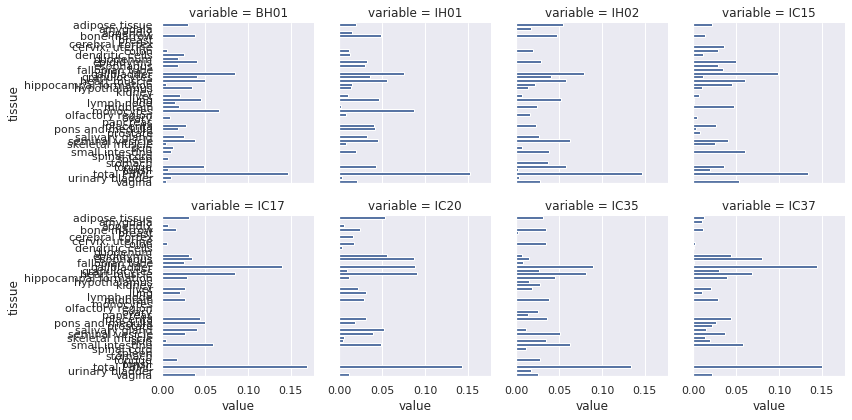

In [509]:
g = sns.FacetGrid(coeff_df_cell_melted, col="variable", col_wrap= 4)
g.map(sns.barplot, 'value', 'tissue')

<AxesSubplot:xlabel='value', ylabel='tissue'>

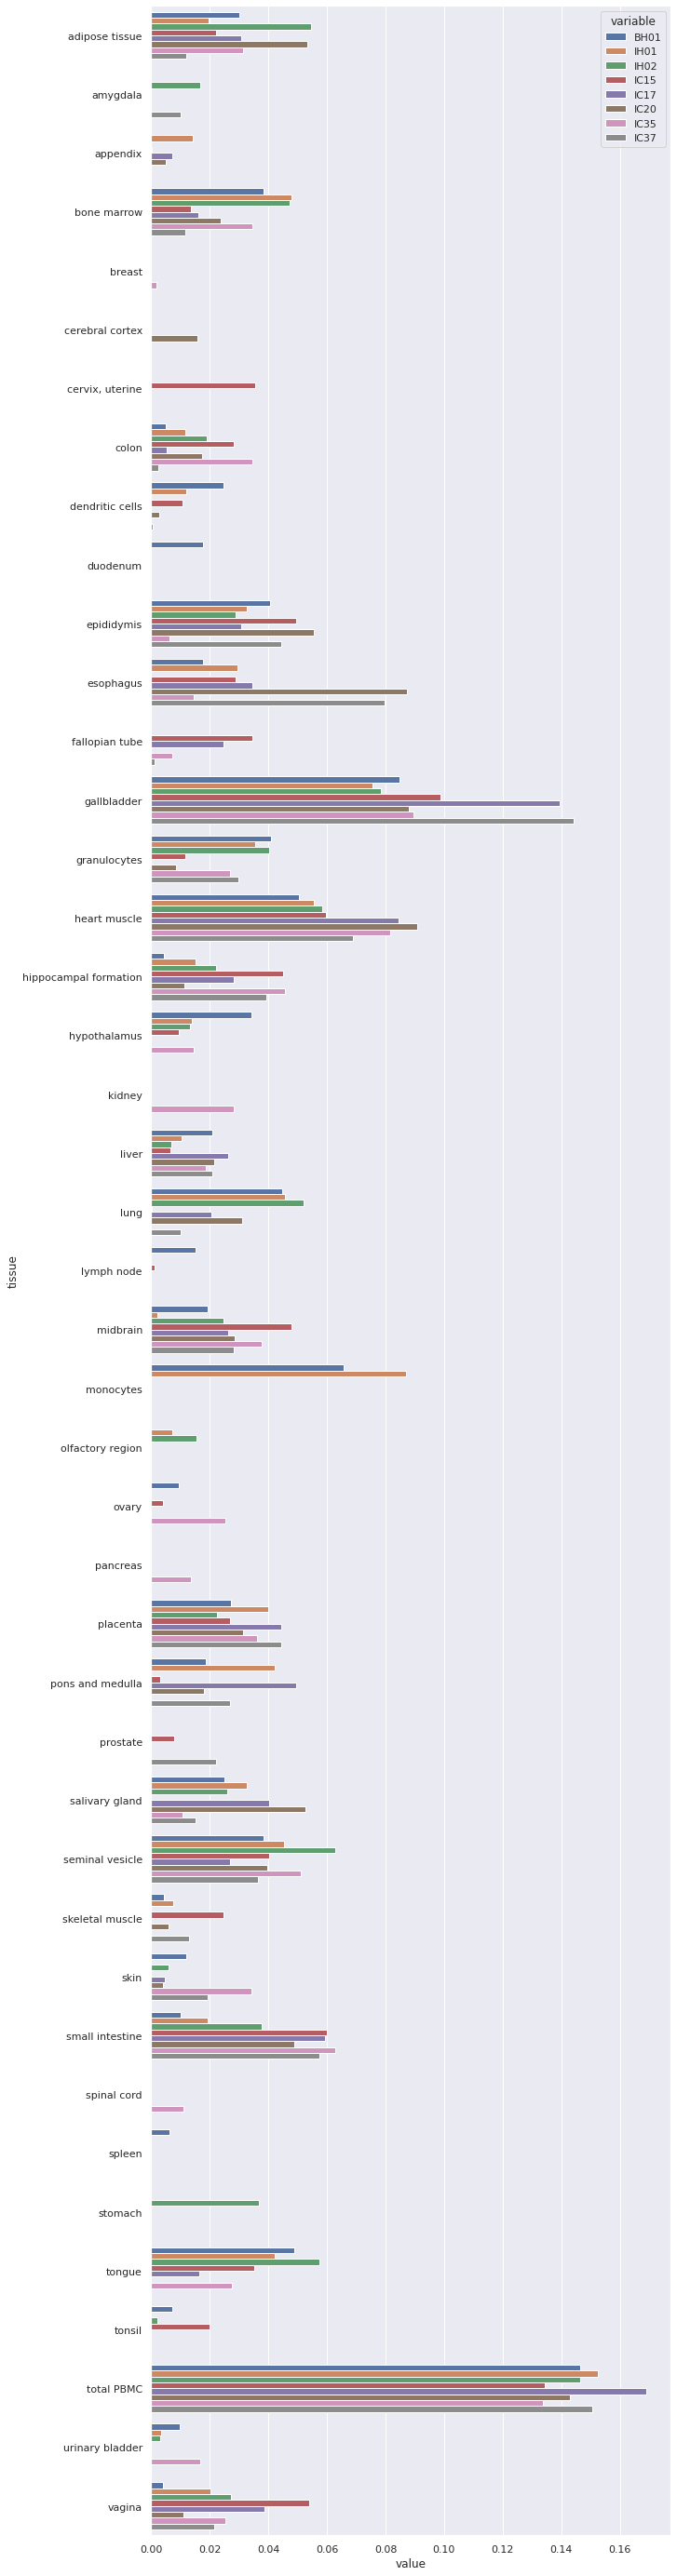

In [473]:
sns.set(rc={'figure.figsize':(10,50)})
sns.barplot(data = coeff_df_cell_melted, x = 'value', y = 'tissue')

### BH01 vs. IH01

In [460]:
diff_to_BH01 = coeff_df_cell.drop('BH01', axis = 1)

In [461]:
diff_to_BH01 = diff_to_BH01.sub(np.array(coeff_df_cell.BH01), axis = 0)

In [ ]:
diff_to_BH01['tissue'] = diff_to_BH01.index


In [425]:
diff_to_BH01_melted = diff_to_BH01.melt(id_vars='tissue')

In [426]:
diff_to_BH01_melted

,tissue,variable,value
0,adipose tissue,IH01,-0.010694
1,amygdala,IH01,0.000000
2,appendix,IH01,0.014111
3,bone marrow,IH01,0.009778
4,breast,IH01,0.000000
...,...,...,...
296,tongue,IC37,-0.048807
297,tonsil,IC37,-0.007054
298,total PBMC,IC37,0.004223
299,urinary bladder,IC37,-0.009634


In [391]:
comp_BH01_IH01 = diff_to_BH01.sub(np.array(coeff_df_cell.BH01), axis = 0)
comp_BH01_IH01 = pd.DataFrame(comp_BH01_IH01.IH01)[comp_BH01_IH01.IH01!=0].sort_values('IH01')

comp_BH01_IC17 = diff_to_BH01.sub(np.array(coeff_df_cell.BH01), axis = 0)
comp_BH01_IC17 = pd.DataFrame(comp_BH01_IC17.IC17)[comp_BH01_IC17.IC17!=0].sort_values('IC17')

comp_BH01_IC20 = diff_to_BH01.sub(np.array(coeff_df_cell.BH01), axis = 0)
comp_BH01_IC20 = pd.DataFrame(comp_BH01_IC20.IC20)[comp_BH01_IC20.IC20!=0].sort_values('IC20')

In [444]:
plt.rcParams["figure.figsize"]=20,20

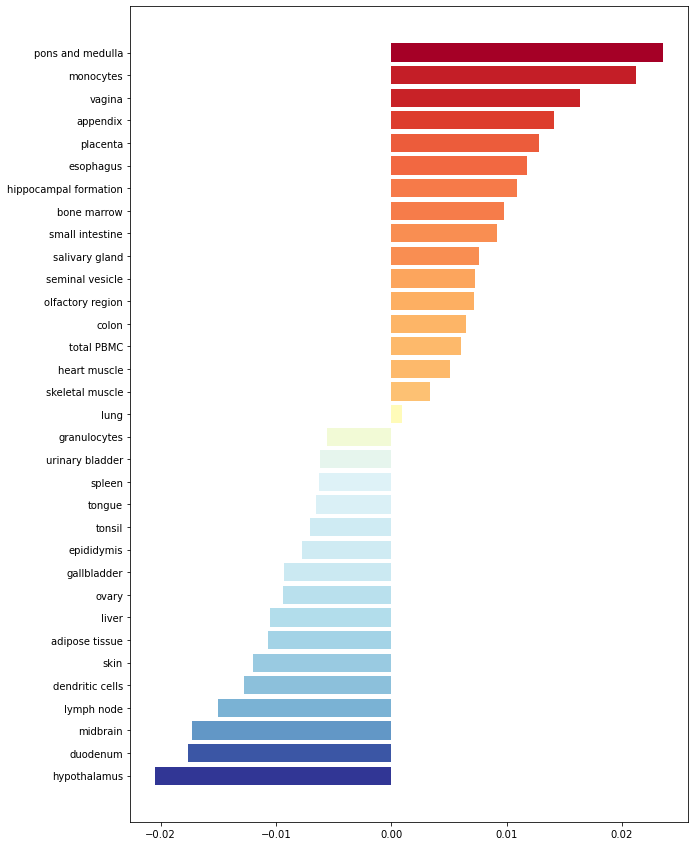

In [456]:
fig, ax = plt.subplots(figsize=(10, 15))

diff_normalized = minmax_scale(comp_BH01_IH01.IH01.values)
my_cmap = plt.cm.get_cmap('RdYlBu')
colors = my_cmap(diff_normalized[::-1])
ax.barh(comp_BH01_IH01.index, comp_BH01_IH01.IH01, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(comp_BH01_IC17.IC17)))

plt.show()

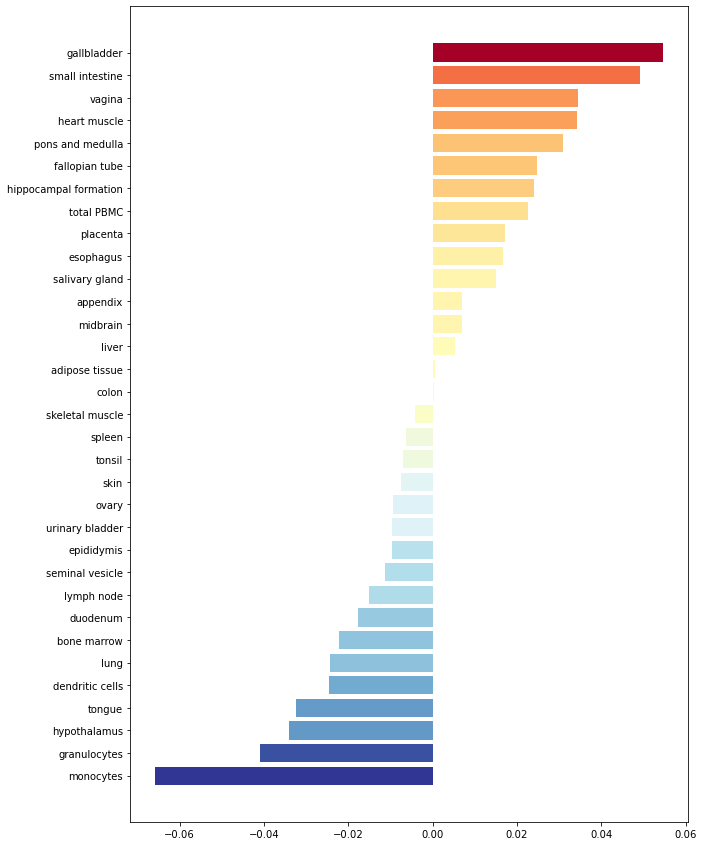

In [454]:
fig, ax = plt.subplots(figsize=(10, 15))

diff_normalized = minmax_scale(comp_BH01_IC17.IC17.values)
my_cmap = plt.cm.get_cmap('RdYlBu')
colors = my_cmap(diff_normalized[::-1])
ax.barh(comp_BH01_IC17.index, comp_BH01_IC17.IC17, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(comp_BH01_IC17.IC17)))

plt.show()


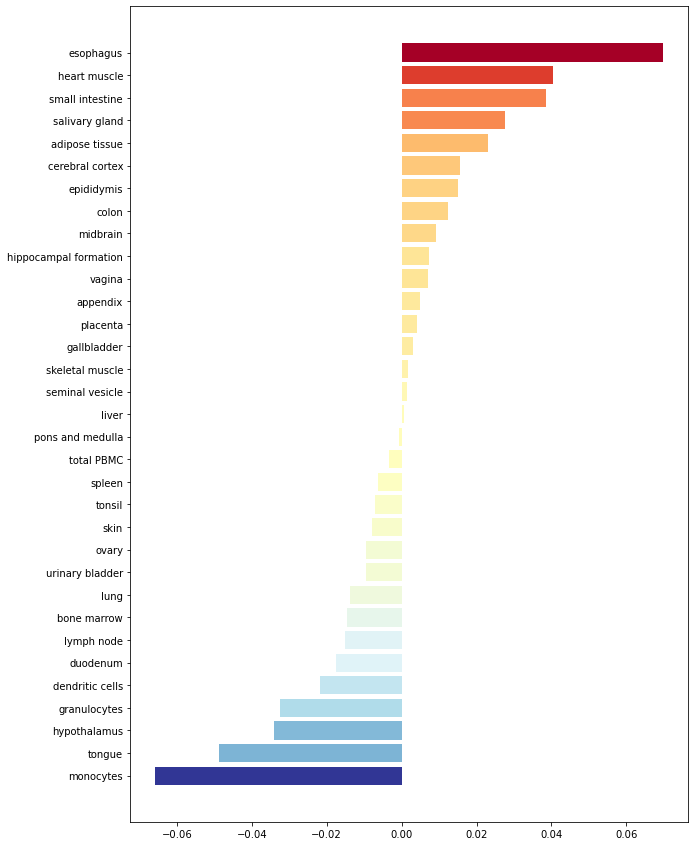

In [451]:
fig, ax = plt.subplots(figsize=(10, 15))

diff_normalized = minmax_scale(comp_BH01_IC20.IC20.values)
my_cmap = plt.cm.get_cmap('RdYlBu')
colors = my_cmap(diff_normalized[::-1])

ax.barh(comp_BH01_IC20.index, comp_BH01_IC20.IC20, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(comp_BH01_IC17.IC17)))

plt.show()


# Correlation

In [516]:
corr_df = pd.DataFrame(index = expressionTissues.columns, columns = pred_cell.keys())

In [517]:
for sample in pred_cell.keys():
    for tissue in expressionTissues.columns: 
        corr_df.loc[tissue,sample] = pred_cell.get(sample).corr(expressionTissues.loc[:,tissue])

In [529]:
for sample in corr_df.columns: 
    print(corr_df.sort_values(sample).loc[:,sample].head(), "\n")

parathyroid gland    0.451875
cerebellum           0.454723
testis               0.473309
thymus               0.527561
pituitary gland      0.542568
Name: BH01, dtype: object 

cerebellum            0.44728
parathyroid gland    0.453036
testis               0.465611
thymus               0.512291
pituitary gland       0.53675
Name: IH01, dtype: object 

parathyroid gland    0.468747
cerebellum           0.476328
testis                0.48503
thymus               0.493013
B-cells              0.558882
Name: IH02, dtype: object 

parathyroid gland    0.456144
thymus               0.458029
cerebellum           0.478633
bone marrow          0.500272
granulocytes         0.500726
Name: IC15, dtype: object 

parathyroid gland    0.451866
cerebellum           0.453538
thymus               0.454616
testis               0.503569
granulocytes         0.508648
Name: IC17, dtype: object 

cerebellum           0.438293
parathyroid gland    0.438756
thymus               0.440529
testis              

# Lasso regression